### TensorFlow 설정하기

In [43]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__ )


TensorFlow version: 2.9.1


In [44]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

### 데이터세트 로드하기
MNIST 데이터세트를 로드하고 준비합니다. 샘플 데이터를 정수에서 부동 소수점 숫자로 변환합니다.

이미지를 어떻게 학습시키는데? 우리가 그동안 배워온 데이터의 형태가 다른걸?! <br>
<br>
숫자로 변환할 수만 있다면 학습 가능! ex) 이미지, 음성 등등

In [45]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [46]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [47]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [48]:
Image.fromarray(x_train[0])


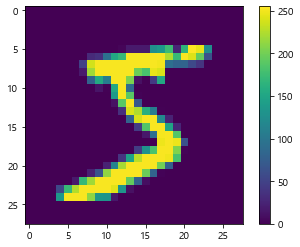

In [50]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [51]:
y_train[0]

5

In [52]:
x_train[0].shape

(28, 28)

In [53]:
x_train, x_test = x_train / 255.0, x_test/ 255.0

In [54]:
# 1. 모델 생성
model = tf.keras.models.Sequential([
    #Flatten -> 2차원 numpy(이미지)를 1차원으로 펴주는 층
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    #과적합 방지를 위해서 노드의 20%를 제거
    tf.keras.layers.Dropout(0.2),
    #10개의 클래스(0~9)로 예측해야 함. 따라서 10개의 노드로 결과를 모아줌
    #softmax로 각 클래스의 확률을 반환...!
    tf.keras.layers.Dense(10, activation='softmax')
])

# 2. 컴파일(너 어떻게 학습할래?! 를 설정해주는 단계)
model.compile(
              #손실함수의 최솟값을 찾기 위한 step 설정
              optimizer = 'adam',
              #loss는 손실함수 지정
              loss = 'sparse_categorical_crossentropy',
              #훈련과정의 기준 지표 설정
              metrics=['accuracy'])

#### Dropout Image
<img src="https://i.stack.imgur.com/c2O5w.png">

- categorical_crossentropy : label값이 이진 원핫 벡터 형태일 때
- sparse_categorical_crossentropy : label값이 정수 형태일 때

In [55]:
x_train.shape

(60000, 28, 28)

각 예시에서 모델은 각 클래스에 대해 하나씩, logits 또는 log-odds 스코어 벡터를 반환합니다.

In [56]:
predictions = model(x_train[:1]).numpy()
predictions

array([[0.07413013, 0.10957366, 0.04787361, 0.11403746, 0.09752093,
        0.09421339, 0.09437426, 0.11174133, 0.11750109, 0.13903405]],
      dtype=float32)

tf.nn.softmax 함수는 다음과 같이 이러한 로짓을 각 클래스에 대한 확률로 변환합니다.

In [57]:
tf.nn.softmax(predictions).numpy()

array([[0.0974185 , 0.10093328, 0.09489392, 0.10138483, 0.09972405,
        0.09939476, 0.09941075, 0.1011523 , 0.1017366 , 0.10395104]],
      dtype=float32)

참고: tf.nn.softmax 함수를 네트워크의 마지막 레이어에 대한 활성화 함수로 베이킹할 수 있습니다.

In [58]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [59]:
loss_fn(y_train[:1], predictions).numpy()

2.3086557

In [60]:
model.compile(optimizer='adam', loss=loss_fn, metrics = ['accuracy'])

### 모델 훈련 및 평가하기
모델을 훈련하고 평가합니다.

In [61]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5


c:\Users\pgho8\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 4s 2ms/step - loss: 0.2980 - accuracy: 0.9123
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1398 - accuracy: 0.9584
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1028 - accuracy: 0.9686
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0851 - accuracy: 0.9736
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0714 - accuracy: 0.9778


In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0640 - accuracy: 0.9799
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0559 - accuracy: 0.9818
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0508 - accuracy: 0.9833
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0476 - accuracy: 0.9841
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0437 - accuracy: 0.9851
313/313 - 1s - loss: 0.0680 - accuracy: 0.9791 - 691ms/epoch - 2ms/step


[0.06796219944953918, 0.9790999889373779]

In [64]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [65]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0.08534074, 0.08534074, 0.08534074, 0.08536693, 0.08534074,
        0.08534136, 0.08534074, 0.23190616, 0.08534074, 0.08534114],
       [0.08533692, 0.08533811, 0.2319666 , 0.08533692, 0.08533692,
        0.08533692, 0.08533692, 0.08533692, 0.08533692, 0.08533692],
       [0.08533895, 0.23193443, 0.08534053, 0.08533898, 0.08534095,
        0.08533897, 0.08533966, 0.08534191, 0.08534669, 0.08533895],
       [0.23196903, 0.08533676, 0.08533677, 0.08533676, 0.08533676,
        0.08533676, 0.08533682, 0.08533676, 0.08533676, 0.08533678],
       [0.08539223, 0.08539221, 0.08539243, 0.08539222, 0.23108925,
        0.08539221, 0.08539222, 0.08539253, 0.08539221, 0.08577256]],
      dtype=float32)>